<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Analyzing a Housing Data set | Machine Learning</h2>
<h4>Model used: Regression</h4>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Purpose of this Script</h2><br>
This script is designed to analyze the <a href="https://www.kaggle.com/prevek18/ames-housing-dataset">Ames Housing Dataset</a>, a popular learning dataset from Kaggle.
<br>
<h2>Analytical Objectives</h2><br>
a) Make a prediction for the sale price of each home, which is assumed to be a continuous variable.<br>
b) Identify key features that impact sale price.
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Importing & Exploring the Data  </h2><br>

In [7]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output

# specifying file name
file = 'Ames Housing Dataset.xlsx'

# reading the file into Python
housing = pd.read_excel(io=file)

<h3>Initial Data Exploration</h3>

<h4>a) How many observations (i.e. rows) are present in the dataset? How many features (i.e. columns)?</h4><br>

In [10]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {housing.shape[0]}
Features:     {housing.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 2930
Features:     22



<h4>b) Display general information about each variable, including types and the number of non-missing values.</h4>

In [11]:
# INFOrmation about each variable
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
Order            2930 non-null int64
Lot_Area         2930 non-null int64
Street           2930 non-null object
Lot_Config       2930 non-null object
Neighborhood     2930 non-null object
Overall_Qual     2930 non-null int64
Overall_Cond     2930 non-null int64
Mas_Vnr_Area     2907 non-null float64
Total_Bsmt_SF    2929 non-null float64
First_Flr_SF     2930 non-null int64
Second_Flr_SF    2930 non-null int64
Gr_Liv_Area      2930 non-null int64
Full_Bath        2930 non-null int64
Half_Bath        2930 non-null int64
Kitchen_AbvGr    2930 non-null int64
TotRms_AbvGr     2930 non-null int64
Fireplaces       2930 non-null int64
Garage_Cars      2929 non-null float64
Garage_Area      2929 non-null float64
Porch_Area       2930 non-null int64
Pool_Area        2930 non-null int64
Sale_Price       2930 non-null int64
dtypes: float64(4), int64(15), object(3)
memory usage: 503.7+ KB


It appears that the dataset contains a mix of data types. Let's analyze this in more detail as it will effect our approach to developing a machine learning model for predicting sale prices ( Sale_Price ). 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Analyzing the Distribution of Sale Prices</h3><br>
Notice how the Y-variable ( <em>Sale_Price</em> ) is encoded as an integer as it does not contain decimal places. This is very common in real estate pricing, but it is a slight violation of continuity. Although this informs us that our modeling results will be flawed, we must keep in mind that statistics and real-world applications are expected to have such misalignment. As a result, <strong>we do not expect our predictions to be perfect, but we do expect to develop a general understanding as to what features affect the sale price of a house in Ames, Iowa</strong>.<br><br>

<h4>c) Develop a histogram to analyze the distribution of the Y-variable.</h4><br>
Does it look as if this variable is normally distributed? Does it appear to be skewed positive or negative?

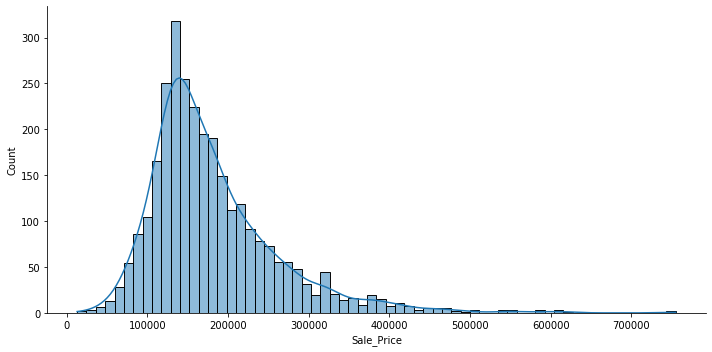

In [12]:
# using the updated version of distplot which is displot
sns.displot(data   = housing,
            x      = "Sale_Price",
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

Using this figure we can see that the <strong>data is aligned with the real world data</strong>, for example most of the homes are in 200,000 range than 800000 which is true. <br>
This is a normal distribution but it is positively skewed <br>
Lets transform this variable and see if it removes the skewness

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>d) Develop a histogram to analyze the distribution of the transformed Y-variable.</h4><br>

In [14]:
# log transforming Sale_Price and saving it to the dataset
housing['log_Sale_Price'] = np.log10(housing['Sale_Price'])

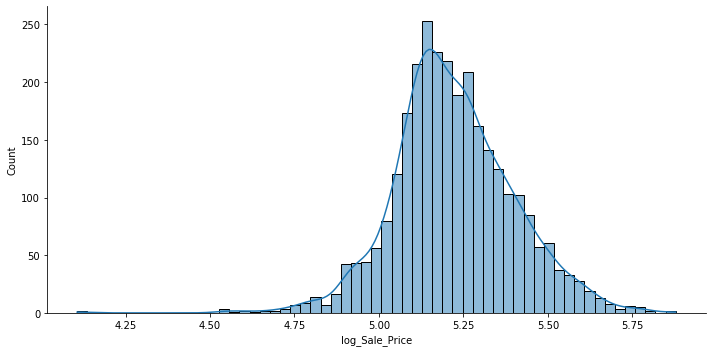

In [16]:
sns.displot(data=housing,x='log_Sale_Price',
            height = 5,
            aspect = 2,
           kde=True)
plt.show()

As we can see the log values are <strong>more normally distributed and less skewed</strong> compared to the original values<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In the previous step, we confirmed that <em>Sale_Price</em> is continuous. Thus, we can approach our predictive modeling challenge with a linear modeling technique. Traditionally, linear models rely on the assumption that all of the variables in our model are continuous. Given this, let's use descriptive statistics to identify X-variables that meet this assumption.<br>
<h4>e) Generate descriptive statistics for each quantitative column.</h4><br>

In [19]:
housing.describe(include = "number").round(2)

,Order,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price,log_Sale_Price
count,2930.00,2930.00,2930.00,2930.00,2907.00,2929.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2929.00,2929.00,2930.00,2930.00,2930.00,2930.00
mean,1465.50,10147.92,6.09,5.56,101.90,1051.61,1159.56,335.46,1499.69,1.57,0.38,1.04,6.44,0.60,1.77,472.82,182.89,2.24,180796.06,5.22
std,845.96,7880.02,1.41,1.11,179.11,440.62,391.89,428.40,505.51,0.55,0.50,0.21,1.57,0.65,0.76,215.05,159.83,35.60,79886.69,0.18
min,1.00,1300.00,1.00,1.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,12789.00,4.11
25%,733.25,7440.25,5.00,5.00,0.00,793.00,876.25,0.00,1126.00,1.00,0.00,1.00,5.00,0.00,1.00,320.00,48.00,0.00,129500.00,5.11
50%,1465.50,9436.50,6.00,5.00,0.00,990.00,1084.00,0.00,1442.00,2.00,0.00,1.00,6.00,1.00,2.00,480.00,165.00,0.00,160000.00,5.20
75%,2197.75,11555.25,7.00,6.00,164.00,1302.00,1384.00,703.75,1742.75,2.00,1.00,1.00,7.00,1.00,2.00,576.00,266.00,0.00,213500.00,5.33
max,2930.00,215245.00,10.00,9.00,1600.00,6110.00,5095.00,2065.00,5642.00,4.00,2.00,3.00,15.00,4.00,5.00,1488.00,1424.00,800.00,755000.00,5.88


<h4>f) identify the data type of each original variable in the dataset basing on the above output.</h4><br>
Use the following groupings:

* CONTINUOUS
* INTERVAL/COUNT
* CATEGORICAL

In [22]:
print("""CONTINUOUS
----------
Sale_Price (Y-variable)
Lot_Area
Mas_Vnr_Area
Total_Bsmt_SF
First_Flr_SF
Second_Flr_SF
Gr_Liv_Area
Garage_Area
Porch_Area
Pool_Area


INTERVAL/COUNT
--------------
Overall_Qual
Overall_Cond
Full_Bath
Half_Bath
Kitchen_AbvGr
TotRms_AbvGr
Fireplaces
Grarage Cars


CATEGORICAL
-----------
Street
Lot Config
Neighborhood
Order (not to be used in modeling) """)

CONTINUOUS
----------
Sale_Price (Y-variable)
Lot_Area
Mas_Vnr_Area
Total_Bsmt_SF
First_Flr_SF
Second_Flr_SF
Gr_Liv_Area
Garage_Area
Porch_Area
Pool_Area


INTERVAL/COUNT
--------------
Overall_Qual
Overall_Cond
Full_Bath
Half_Bath
Kitchen_AbvGr
TotRms_AbvGr
Fireplaces
Grarage Cars


CATEGORICAL
-----------
Street
Lot Config
Neighborhood
Order (not to be used in modeling) 


<h2>Part II: Handling Missing Values  </h2><br>

<h4>a) Display the number of missing values in the dataset.</h4>

In [25]:
# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

housing.isnull().sum(axis=0)

Order              0
Lot_Area           0
Street             0
Lot_Config         0
Neighborhood       0
Overall_Qual       0
Overall_Cond       0
Mas_Vnr_Area      23
Total_Bsmt_SF      1
First_Flr_SF       0
Second_Flr_SF      0
Gr_Liv_Area        0
Full_Bath          0
Half_Bath          0
Kitchen_AbvGr      0
TotRms_AbvGr       0
Fireplaces         0
Garage_Cars        1
Garage_Area        1
Porch_Area         0
Pool_Area          0
Sale_Price         0
log_Sale_Price     0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) flagging the missing values.</h4><br>

In [26]:
# looping to detect features with missing values
for col in housing:

    # creating columns with 1s if missing and 0 if not
    if housing[col].isnull().astype(int).sum() > 0:
        housing['m_'+col] = housing[col].isnull().astype(int) # flagging them

In [27]:
# summing the missing value flags to check the results of the loop above
housing[    ['m_Mas_Vnr_Area', 'm_Total_Bsmt_SF',
             'm_Garage_Cars', 'm_Garage_Area']    ].sum(axis = 0)

m_Mas_Vnr_Area     23
m_Total_Bsmt_SF     1
m_Garage_Cars       1
m_Garage_Area       1
dtype: int64